![](http://4.bp.blogspot.com/-vKTlnfnQDVk/VfDW2jkqoyI/AAAAAAABU_o/BvQZMfZqAho/s1600/mnist.JPG)

# What is MNIST Dataset?

The MNIST database is a large database of handwritten digits that is commonly used for training various image processing systems.The MNIST dataset was constructed from two datasets of the US National Institute of Standards and Technology. The data is taken from 250 different people which include 50% students and 50% employee from Census Bureau. The purpose of the database is to use it for training and testing in the field of machine learning. 

MNIST is like the "Hello World" of machine learning. Its a database of handwritten digits (0-9), with which you can try out a few machine learning algorithms. The MNIST database contains 60,000 training images and 10,000 testing images.It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

The purpose of this notebook is to read the MNIST dataset efficiently into memory in Python.


### Imports

In [1]:
import numpy as np
import os
import urllib.request
import gzip
import matplotlib.pyplot as plt
import shutil

This is for the table to be alligned to the left rather then the middle

In [2]:
%%html
<style>
table {margin-left: 0 !important;}
</style>

### Download the dataset to a folder

In [3]:
# First make a folder which will store the the downloads
path = 'data/'

# If the file does not exist then make a new file 
# This makes sure that a file is made even when it doesnt exist
if not os.path.exists(path):
    os.makedirs(path)

### Get the file url from [Data Set website](http://yann.lecun.com/exdb/mnist/) 

In [4]:
# This is the url we will download the file from 
# This has all the train images from the database 
url = 'http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz'

# "Method returns a list of strings after breaking the given string by the specified separator"
# im using the split method to get the last value whic is the name of the file
#filename = url.split('/')[5] # i could do it this way or go to the last value
file = url.split('/')[-1]

#if the file that im downloading already exists
# Then it will not download it 
if os.path.exists(path+file):
    print('The File Youre trying to download already exists!', file)
else:
    #if the file does not exist the it will download the file 
    print('The',file, 'Is Downloading')
    urllib.request.urlretrieve (url, path+file)
    
# This here shows how many files exist in the directory 
print()
print('These are the files in the Directory')
os.listdir('data')


The train-images-idx3-ubyte.gz Is Downloading

These are the files in the Directory


['train-images-idx3-ubyte.gz']

### Dowload the rest of the files

In [5]:
# This will store all the rest of urls that i need to download
# The Train labels/Test Images /Test Labels
urls = ['http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz',
        'http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz',
        'http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz']

# We can go through a for loop and download the files
for url in urls:
    # We can then split each url to just the file name 
    file = url.split('/')[-1]
    # print(file)
    
    #Now in the for loop check if the file exists 
    #if the file that im downloading already exists
    # Then it will not download it 
    if os.path.exists(path+file):
        print('The File Youre trying to download already exists!', file)
    else:
         #if the file does not exist the it will download the file
        print('The',file, 'Is Downloading')
        urllib.request.urlretrieve (url, path+file)
        
# This here shows how many files exist in the directory
# It should have 4 different files in the folder 
print()
print('These are the files in the Directory')
#lists the directory
os.listdir('data')

The train-labels-idx1-ubyte.gz Is Downloading
The t10k-images-idx3-ubyte.gz Is Downloading
The t10k-labels-idx1-ubyte.gz Is Downloading

These are the files in the Directory


['t10k-images-idx3-ubyte.gz',
 't10k-labels-idx1-ubyte.gz',
 'train-images-idx3-ubyte.gz',
 'train-labels-idx1-ubyte.gz']

### Read the contents of the file 

##### TRAINING SET IMAGE FILE (train-images-idx3-ubyte)
Pixels are organized row-wise. Pixel values are 0 to 255. 0 means background (white), 255 means foreground (black).

|Offset | Type               | Value           |   Description                   |
|:------|:-------------------|:----------------|:--------------------------------|
|0000   |32 bit integer      |0x00000801(2051) |magic number                     |
|0004   |32 bit integer      |10000 or 60000   |number of images                 |
|0008   |32 bit integer      |28               |number of rows                   |
|0012   |32 bit integer      |28               |number of columns                |
|0016   |unsigned byte       |??               |pixel                            |
|0017   |unsigned byte       |??               |pixel                            |
|...    |...                 |...              |...                              |
|xxxx   |unsigned byte       |??               |pixel                            |

In [6]:
# open the file and read the contents of the file to a variable called fileC
with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    fileC = f.read()

In [7]:
#The first 4 bits means its a magic number 
fileC[0:4] #The magic number is an integer (MSB first). The first 2 bytes are always 0. 
# The third byte codes the type of the data: 
#The 4-th byte codes the number of dimensions of the vector/matrix: 1 for vectors, 2 for matrices

b'\x00\x00\x08\x03'

In [8]:
#The actual value in int
int.from_bytes(fileC[0:4], byteorder='big')

2051

In [9]:
print(fileC[4:8]) # This here is the size of the images 
# its in the binary form so the actual number is 010000 if
# you read it the opposite 
int.from_bytes(fileC[4:8], byteorder='big')

b"\x00\x00'\x10"


10000

In [10]:
print(fileC[8:12])# This is the number of rows
int.from_bytes(fileC[8:12], byteorder='big') # There are 28 rows 

b'\x00\x00\x00\x1c'


28

In [11]:
print(fileC[12:16])# This is the number of columns
int.from_bytes(fileC[12:16], byteorder='big') # There are 28 columns 

b'\x00\x00\x00\x1c'


28

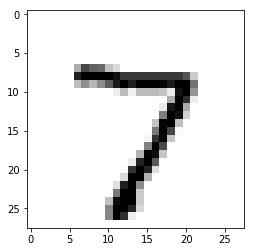

In [12]:
# 28 * 28 is equal = 784 which is equal to one image 
# so every 784 pixels is a image 
image = ~np.array(list(fileC[16:800])).reshape(28,28).astype(np.uint8)
plt.imshow(image, cmap='gray')

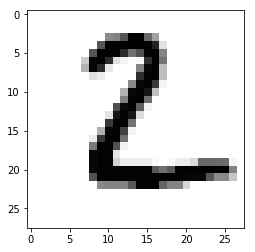

In [13]:
# 28 * 28 is equal = 784 which is equal to one image 
# so every 784 pixels is a image 
image = ~np.array(list(fileC[800:1584])).reshape(28,28).astype(np.uint8)
plt.imshow(image, cmap='gray')

## Save The file as images 

### Extract The Downloads 

In [14]:
#source = os.listdir("data")
#destination = "data/data"

#for f1 in source:
 #   if files.endswith(".gz"):
  #      print('hello')
   #     shutil.copyfile(destination, f1)

#Tried to copy the files but was denied permission


In [2]:
# Im going to make a new folder and try to extract the folder their
# First make a folder which will store the the downloads
path2 = 'data/data/'

# If the file does not exist then make a new file 
# This makes sure that a file is made even when it doesnt exist
if not os.path.exists(path2):
    os.makedirs(path2)
    
# This will store all the rest of urls that i need to download
# The Train labels/Test Images /Test Labels
urls = ['http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz',
        'http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz',
        'http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz',
        'http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz']

# We can go through a for loop and download the files
for url in urls:
    # We can then split each url to just the file name 
    file = url.split('/')[-1]
    # print(file)
    
    #Now in the for loop check if the file exists 
    #if the file that im downloading already exists
    # Then it will not download it 
    if os.path.exists(path2+file):
        print('The File Youre trying to download already exists!', file)
    else:
         #if the file does not exist the it will download the file
        print('The',file, 'Is Downloading')
        urllib.request.urlretrieve (url, path2+file)
print('Done')


The train-images-idx3-ubyte.gz Is Downloading
The train-labels-idx1-ubyte.gz Is Downloading
The t10k-images-idx3-ubyte.gz Is Downloading
The t10k-labels-idx1-ubyte.gz Is Downloading
Done


### Extract
The files are in a format so we need to extract it

In [3]:
# This here shows how many files exist in the directory
# It should have 4 different files in the folder 
# get a list of all the files in the folder 'data/data'
files = os.listdir(path2)

#the for loop goes through each file and extracts it 
for file in files:
    #checks if the file ends in .gz 
    if file.endswith('.gz'):
        #this reads the file with gzip 
        with gzip.open(path2+file, 'rb') as In:
           #removes the .gz file
            with open(path2+file.split('.')[0], 'wb') as out:
                #shutil copies the contents from In to out
                shutil.copyfileobj(In, out)
print('Done')

Done


### Delete the .gz Files

In [4]:
for file in files:
    if file.endswith('.gz'):
        os.remove(path2+file)   
    else:
        print('All files have been Removed')
              
print ('Removed all the .GZ files')

All files have been Removed
All files have been Removed
All files have been Removed
All files have been Removed
Removed all the .GZ files


### Convert the ubyte files to numpy arrays 
I will convert the ubyte into 4 n dimensional arrays.

| Key           |  Type        |Shape         |
|---------------|--------------|--------------|
| train_images  |numpy ndarray |[60000,28,28] |
| test_images   |numpy ndarray |[10000,28,28] |
| train_labels  |numpy ndarray |[60000]       |
| test_labels   |numpy ndarray |[10000]       |


In [5]:
# This here shows how many files exist in the directory
# It should have 4 different files in the folder 
# get a list of all the files in the folder 'data/data'
files = os.listdir(path2)

ndArray = {}

#go through a loop and add the files to the ndarray
for file in files:
    #if the extracted file matches then proceed
    if file.endswith('ubyte'):
        #print('Reading the file', file)
        #open the file if the it ends with ubyte and read 
        with open (path2+file,'rb') as f:
            #read the file 
            data = f.read() 
            # find out the magic number of the file
            magic = int.from_bytes(data[0:4], byteorder='big')
            # find out the size of the images 
            size = int.from_bytes(data[4:8], byteorder='big')
            
            # this is the size of Test images and labels 
            if (size==10000):
                #here we will know if the file is a test image/label 
                trainOrTest = 'test'
            # this is the size for training labels and images 
            elif (size == 60000):
                #here we will know if the file is a Training image/label 
                trainOrTest = 'train'
            # This checks the magic number 2051 which is for image files 
            if (magic == 2051):
                imgOrLAbel = 'images'
                #This gets the nummber of rows 
                rows = int.from_bytes(data[8:12], byteorder='big')
                #this gets the number of columns 
                cols = int.from_bytes(data[12:16], byteorder='big')
                # read values as ints # start from 16 as pixels being from byte 16
                parsed = np.frombuffer(data,dtype = np.uint8, offset = 16) 
                # we will reshape the length, 28 x 28 
                parsed = parsed.reshape(size,rows,cols)  
            # this checks the magic number 2049 which is for labels 
            elif (magic == 2049):
                imgOrLAbel = 'labels'
                # read values as ints
                parsed = np.frombuffer(data, dtype=np.uint8, offset=8)
                #reshape 
                parsed = parsed.reshape(size)
            #save each file as a array with their key 
            ndArray[trainOrTest+'_'+imgOrLAbel] = parsed
    else:
        print('No File Found')
print('Done')

Done


In [6]:
#check if the arrays are created for each file 
ndArray.keys()

dict_keys(['test_images', 'test_labels', 'train_images', 'train_labels'])

In [9]:
# this shows the shap of the test images 
# It has 10000 images and rows = 28 and cols = 28
ndArray['test_images'].shape

(10000, 28, 28)

In [10]:
# This prints out the first test_images 
ndArray['test_images'][0,:,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

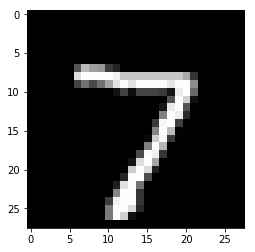

In [11]:
# This prints out the first image 
image = ndArray['test_images'][0,:,:]
plt.imshow(image, cmap='gray')

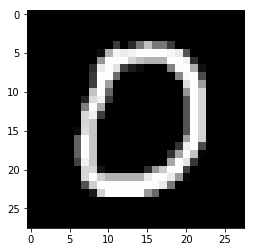

In [13]:
# This prints out the 11th image 
image = ndArray['test_images'][10,:,:]
plt.imshow(image, cmap='gray')

### Downloading Images from the dataset

### Links
[What is MNIST?](https://en.wikipedia.org/wiki/MNIST_database)<br/>
[How to make a directory?](https://thispointer.com/how-to-create-a-directory-in-python/) <br/>
[Split()](https://www.geeksforgeeks.org/python-string-split/)<br/>
[Dowload http file in Python](https://stackoverflow.com/questions/19602931/basic-http-file-downloading-and-saving-to-disk-in-python)<br/>
[Download Files with Python](https://stackabuse.com/download-files-with-python/)<br/>
[How do I list all files of a directory?](https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory)<br/>
[ipython notebook align table to the left of cell](https://stackoverflow.com/questions/21892570/ipython-notebook-align-table-to-the-left-of-cell)<br/>
[How to Delete a file?](https://www.cyberciti.biz/faq/python-delete-remove-file-if-exists-on-disk/)<br/>